### 05 : keras and MNIST 데이터를 활용한 classification 설계

임규연 (lky473736)

-----
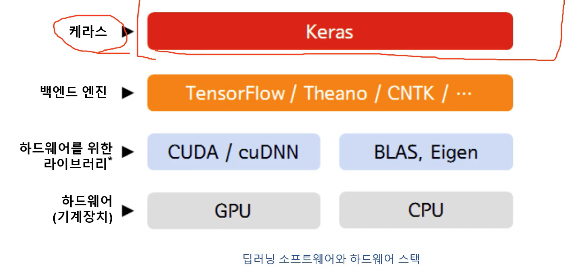



#### keras
- 딥러닝 모델 제작, 학습, 테스트 (compile, fit, predict)
- 백엔드 엔진 사용 (명령어, 다른 말로 api를 실제로 실행)
- 여러 백엔드 엔진과 연동 가능

**모델 구성 순서**
- 데이터셋 생성 : data로부터 train, validation, test 만들기
- 모델 구성 (모델링) : Sequential 모델을 생성 후 필요한 레이어 추가하며 구성함 or 이미 만들어진 모델 사용
- 모델 학습과정 설정 : compile, 손실함수 및 최적화 방법 정의
- fit : train 데이터를 이용하여 학습
- evaluate, predict (test 데이터)



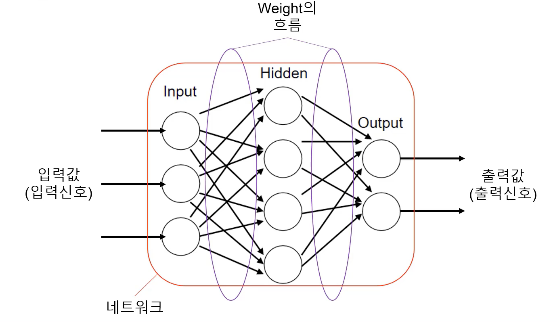

<hr>

In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

2024-04-14 19:22:09.937881: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# t
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
# 이미지 데이터 준비하기 (모델에 맞는 크기로 바꾸고 0 과 1 사이로 스케일링)
train_X = train_X.reshape((60000, 28 * 28,))
train_X = train_X.astype('float32') / 255
test_X = test_X.reshape((10000, 28 * 28,))
test_X = test_X.astype('float32') / 255

In [7]:
# 레이블을 범주형으로 인코딩
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [8]:
# 모델 정의하기 (여기에서는 Sequential 클래스 사용)
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
# 모델 컴파일 하기
model.compile(optimizer='rmsprop', loss="categorical_crossentropy", metrics=['accuracy'])

In [10]:
# fit() 메서드로 모델 훈련 시키기
model.fit(train_X, train_y, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2685 - accuracy: 0.9222
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1075 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0712 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0517 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0388 - accuracy: 0.9882


In [11]:
# 테스트 데이터로 정확도 측정하기
test_loss, test_acc = model.evaluate(test_X, test_y)
print('test_acc: ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0627 - accuracy: 0.9801
test_acc:  0.9800999760627747
